# Field Test 4/15/24
On 4/15/24 a field test was completed to evaluate the effectivness of the multiparameter low-cost sensor versus a commerical sensor. 

## Methods
Field testing was performed in the Intracoastal Waterway (ICW) this is a waterbody that spans from the North Atlantic to the Gulf of Mexico and is primarily composed of saltwater. The fieldwork performed was in the southern North Carolina portion of the ICW at the UNCW Center for Marine Science. This location was chosen as the Coastal Ocean Research and Monitoring Program (CORMP). Water samples were collected using a YSI at the CMS dock at 15-minute intervals. This provides an effective commercial sensor to compare with the results of the low-cost sensor. This sensor is located at the end of the CMS dock. The first field test took place on April 15th, 2023, from 10:15am-2:00pm. Water samples were taken from the surface of the water with a beaker next to the CORMP YSI EXO2 Multiparameter Sonde. These water samples were taken at 15-minute intervals to correspond with the sample intervals of the CORMP YSI EXO2 Multiparameter Sonde (commercial sensor). After the water sample was collected with the beaker, by skimming the beaker along the surface of the water. A cuvette was filled with the water sample until it overflowed and dumped out 3 times. Then the fourth time the cuvette was filled to the top and placed into the sensor. The sensor was then covered with the cap. The turbidity was measured first by the sensor for one minute and then the chlorophyll was measured by the sensor for one minute. Following both measurements the cuvette was taken out of the sensor and the water sample was dumped into the ICW. This procedure was repeated 15 more times. 

The average chlorophyll measurments in F8 values from the low-cost sensor was run through the equation y = 0.7231x + 9.0639 this is the line of best fit equation derived from the chlorophyll dilution tests in the water resistant hoising. 

The average turbidity measurments in NIR values from the low-cost sensor was run through the equation y = 76.3208x + 1578.2578 this is the line of best fit equation derived from the turbiodity dilution tests in the water resistant hoising. 

The CORMP measurements for both chlorophyll and turbidity were obtained from: https://cormp.org/?health=Off&quality=Off&units=English&duration=3%20days&maps=storm_tracks&legend=Off&forecast=Point&hti=&nhc=undefined&nhcWinds=undefined&sst=&current=&datum=MLLW&windPrediction=wind%20speed%20prediction&region=&bbox=-97.20703125000001,21.4121622297254,-63.67675781250001,43.35713822211053&iframe=null&mode=home&basemap=Streets&basemap_overlays=Bathymetry&layer_opacity=100&platform=CMSDOCK

# Chlorophyll Results

The chlorophyll measurements from the low-cost sensor and commercial sesnor were compared. The commercial sensor values were plotted on the x-axis and the low-cost sensor values were plotted on the y-axis. The R2, and line-of-best fit were calculated, with the following code. 

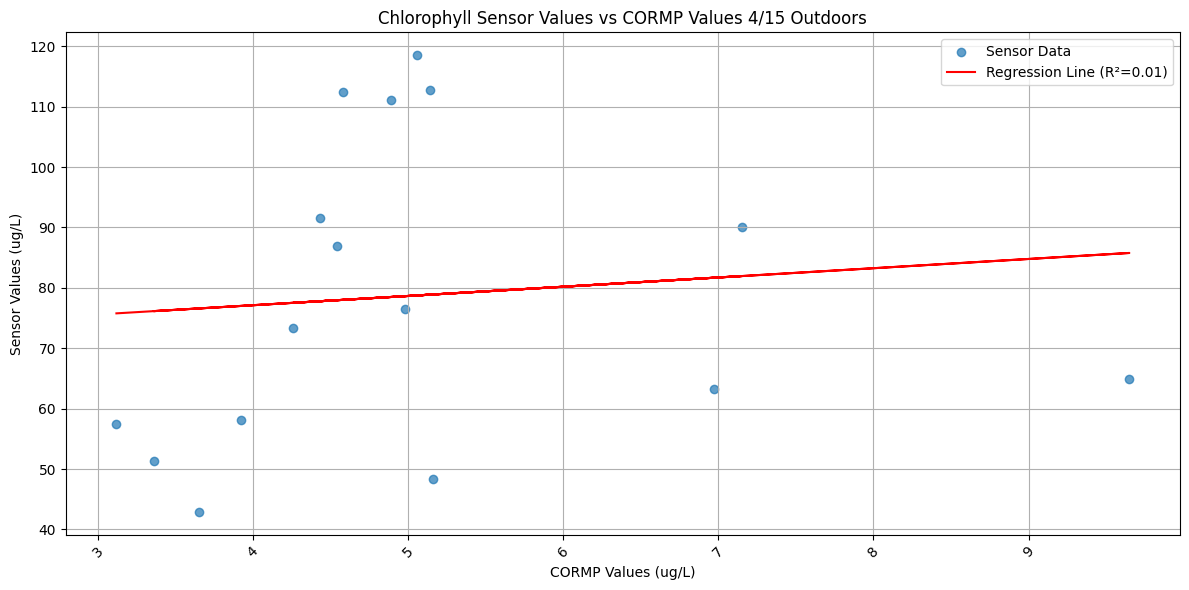

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


additional_chl_values = {
    ' Approx Time': ['10:15', '10:30','10:45','11:00','11:15', '11:30','11:45', '12:00','12:15', '12:30','12:45','13:00','13:15', '13:30','13:45','14:00'],
    'ug/L': [3.12, 3.92, 4.89, 5.14, 5.06, 7.15,4.58, 3.36, 3.65, 4.54, 4.26, 5.16, 9.65, 4.98, 4.43, 6.97]
} # 4/15 data morning outside 

## Read the CSV file
df = pd.read_csv('/Users/jessiewynne/chl_dock_test_4_15_24 .csv')

# Clean the 'NIR (Raw)' column
df['F8 (Raw)'] = pd.to_numeric(df['F8 (Raw)'], errors='coerce')

# Remove rows with NaN values in the 'NIR (Raw)' column
df_csv = df.dropna(subset=['F8 (Raw)'])

# Group by 'Approx Time' and calculate the average of 'NIR (Raw)' for each group
averages_csv = df_csv.groupby(' Approx Time')['F8 (Raw)'].mean()

# Solve for x using the equation y = 76.3208x + 1578.2578
x_values_csv = ((averages_csv - 9.0639) / 0.7231)

# Create a DataFrame for the additional FTU values
df_chl = pd.DataFrame(additional_chl_values)

# Merge the CSV and additional FTU DataFrames on 'Approx Time' with specified suffixes
merged_df = pd.merge(df_chl, pd.DataFrame(averages_csv), left_on=' Approx Time', right_index=True, how='inner', suffixes=('_x', '_y'))

# Reset the index of x_values_csv
x_values_csv = x_values_csv.reset_index(drop=True)

# Filter out the 'DI' row
df_f8 = df_chl[df_chl[' Approx Time'] != 'DI']

# Plot the data
plt.figure(figsize=(12, 6))
plt.scatter(df_f8['ug/L'], x_values_csv, label='Sensor Data', alpha=0.7)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_f8['ug/L'], x_values_csv)

# Calculate R-squared
r_squared = r_value ** 2

# Plot the regression line
plt.plot(df_f8['ug/L'], slope * df_f8['ug/L'] + intercept, color='red', label=f'Regression Line (R²={r_squared:.2f})')

plt.xlabel('CORMP Values (ug/L)')
plt.ylabel('Sensor Values (ug/L)')
plt.title('Chlorophyll Sensor Values vs CORMP Values 4/15 Outdoors')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Turbidity Results

The turbidity measurements from the low-cost sensor and commercial sesnor were compared. The commercial sensor values were plotted on the x-axis and the low-cost sensor values were plotted on the y-axis. The R2, and line-of-best fit were calculated, with the following code. 

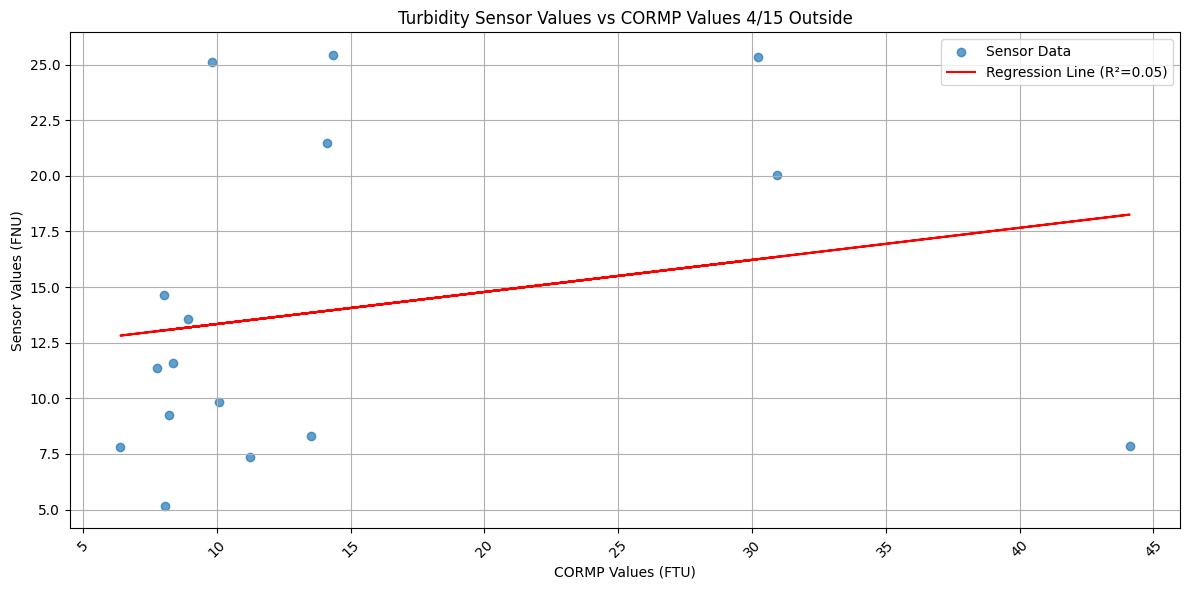

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


additional_fnu_values = {
    ' Approx Time': ['10:15', '10:30','10:45','11:00','11:15', '11:30','11:45', '12:00','12:15', '12:30','12:45','13:00','13:15', '13:30','13:45','14:00'],
    'FNU': [8.02, 7.77, 9.81, 8.38, 14.35, 30.22, 14.13, 6.40, 8.08, 8.22, 10.08, 13.51, 44.11, 11.25, 8.93, 30.95]
} #4/15 data

## Read the CSV file
df = pd.read_csv('/Users/jessiewynne/turb_dock_test_4_15_24_no_DI.csv')

# Clean the 'NIR (Raw)' column
df['NIR (Raw)'] = pd.to_numeric(df['NIR (Raw)'], errors='coerce')

# Remove rows with NaN values in the 'NIR (Raw)' column
df_csv = df.dropna(subset=['NIR (Raw)'])

# Group by 'Approx Time' and calculate the average of 'NIR (Raw)' for each group
averages_csv = df_csv.groupby(' Approx Time')['NIR (Raw)'].mean()

# Solve for x using the equation y = 76.3208x + 1578.2578
x_values_csv = (averages_csv - 1507.2419) / 79.5485

# Create a DataFrame for the additional FTU values
df_fnu = pd.DataFrame(additional_fnu_values)

# Merge the CSV and additional FTU DataFrames on 'Approx Time' with specified suffixes
merged_df = pd.merge(df_fnu, pd.DataFrame(averages_csv), left_on=' Approx Time', right_index=True, how='inner', suffixes=('_x', '_y'))

# Reset the index of x_values_csv
x_values_csv = x_values_csv.reset_index(drop=True)

# Filter out the 'DI' row
df_f8 = df_fnu[df_fnu[' Approx Time'] != 'DI']

# Plot the data
plt.figure(figsize=(12, 6))
plt.scatter(df_f8['FNU'], x_values_csv, label='Sensor Data', alpha=0.7)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_f8['FNU'], x_values_csv)

# Calculate R-squared
r_squared = r_value ** 2

# Plot the regression line
plt.plot(df_f8['FNU'], slope * df_f8['FNU'] + intercept, color='red', label=f'Regression Line (R²={r_squared:.2f})')

plt.xlabel('CORMP Values (FTU)')
plt.ylabel('Sensor Values (FNU)')
plt.title('Turbidity Sensor Values vs CORMP Values 4/15 Outside')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()